In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score

## Wczytuję i skaluję dane, dzielę na zbiór treningowy i testowy

In [2]:
dane1 = pd.read_excel('zb1.xlsx')
cechy = ['AssetZip', 'Lat', 'Long', 'AvgRepairCost',
       'Age', 'PMLate', 'WaterExposure', 'MultipleConnects', 'Storm',
       'Overloads', 'MilesFromOcean', 'Repairs', 'GE', 'Other',
       'Schneider Electric', 'Siemens', '1-Phase Pole Transformer',
       '3-Phase Transformer', 'DF-series Transformer', 'Padmount Transformer',
       'Voltage Transformer']
scaler = StandardScaler()
przeskalowane = scaler.fit_transform(dane1[cechy])
dane_przeskalowane = pd.DataFrame(data=przeskalowane,columns=cechy)
split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)
for train_index, test_index in split.split(dane_przeskalowane, dane_przeskalowane[['PMLate','Storm','WaterExposure','MilesFromOcean']]):
    X_train= dane_przeskalowane.loc[train_index]
    y_train = dane1['Status'].loc[train_index]
    X_test = dane_przeskalowane.loc[test_index]
    y_test = dane1['Status'].loc[test_index]

## Zbiór cech zdefiniowany we wcześniejszym kroku

In [3]:
cechy = ['PMLate', 'WaterExposure', 'Storm', 'AssetZip', 'AvgRepairCost', 'Age', 'Schneider Electric', 'Siemens', '1-Phase Pole Transformer', '3-Phase Transformer', 'Overloads', 'MilesFromOcean']

In [4]:
def rysuj(x,y_train,y_test,parametr,tytul):
    fig, ax = plt.subplots()
    ax.set_xlabel(parametr)
    ax.set_ylabel("dokładność")
    ax.set_title(tytul)
    ax.plot(x, y_train, marker='o', label="train")
    ax.plot(x, y_test, marker='o', label="test")
    
    ax.legend()
    plt.show()

# patametr max_depth

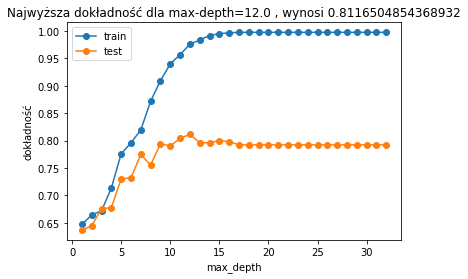

In [5]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []

dokladnosc = []
tmp_cechy = cechy
for element in max_depths:
        clf = DecisionTreeClassifier(max_depth=element,random_state=0)
        clf.fit(X_train[tmp_cechy],y_train)
        yt_pred = clf.predict(X_train[tmp_cechy])
        y_pred = clf.predict(X_test[tmp_cechy])
    
        
        zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
        zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
        dokladnosc.append(accuracy_score(y_test,y_pred))

max_el = max(dokladnosc)
indeks = dokladnosc.index(max_el)

tytul = 'Najwyższa dokładność dla max-depth={} , wynosi {}'.format(max_depths[indeks],max_el)
rysuj(max_depths,zb_trenujacy_wyniki,zb_testowy_wyniki,'max_depth',tytul)

# parametr min_samples_split

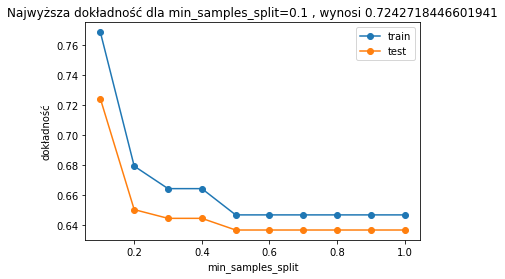

In [6]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []

dokladnosc = []
tmp_cechy = cechy
for element in min_samples_splits:
        clf = DecisionTreeClassifier(min_samples_split=element,random_state=0)
        clf.fit(X_train[tmp_cechy],y_train)
        yt_pred = clf.predict(X_train[tmp_cechy])
        y_pred = clf.predict(X_test[tmp_cechy])
    
        
        zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
        zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
        dokladnosc.append(accuracy_score(y_test,y_pred))

max_el = max(dokladnosc)
indeks = dokladnosc.index(max_el)

tytul = 'Najwyższa dokładność dla min_samples_split={} , wynosi {}'.format(min_samples_splits[indeks],max_el)
rysuj(min_samples_splits,zb_trenujacy_wyniki,zb_testowy_wyniki,'min_samples_split',tytul)

# parametr min_samples_leaf

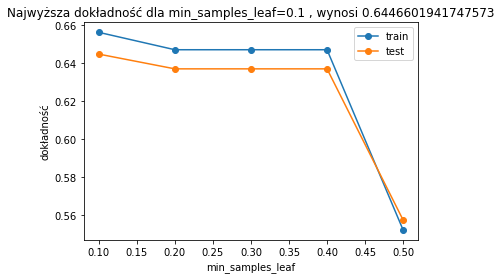

In [7]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []

dokladnosc = []
tmp_cechy = cechy
for element in min_samples_leafs:
    
    clf = DecisionTreeClassifier(min_samples_leaf=element,random_state=0)
    clf.fit(X_train[tmp_cechy],y_train)
    yt_pred = clf.predict(X_train[tmp_cechy])
    y_pred = clf.predict(X_test[tmp_cechy])
    
        
    zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
    zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
    dokladnosc.append(accuracy_score(y_test,y_pred))

max_el = max(dokladnosc)
indeks = dokladnosc.index(max_el)

tytul = 'Najwyższa dokładność dla min_samples_leaf={} , wynosi {}'.format(min_samples_leafs[indeks],max_el)
rysuj(min_samples_leafs,zb_trenujacy_wyniki,zb_testowy_wyniki,'min_samples_leaf',tytul)

# parametr max_features

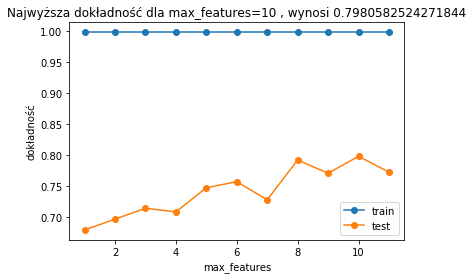

In [8]:

ile_cech = list(range(1,len(cechy)))

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []

dokladnosc = []
tmp_cechy = cechy
for element in ile_cech:
    
    clf = DecisionTreeClassifier(max_features=element,random_state=0)
    clf.fit(X_train[tmp_cechy],y_train)
    yt_pred = clf.predict(X_train[tmp_cechy])
    y_pred = clf.predict(X_test[tmp_cechy])
    
        
    zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
    zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
    dokladnosc.append(accuracy_score(y_test,y_pred))

max_el = max(dokladnosc)
indeks = dokladnosc.index(max_el)

tytul = 'Najwyższa dokładność dla max_features={} , wynosi {}'.format(ile_cech[indeks],max_el)
rysuj(ile_cech,zb_trenujacy_wyniki,zb_testowy_wyniki,'max_features',tytul)

# parametr ccp_alpha

In [9]:
tmp_cechy = cechy
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train[tmp_cechy], y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Zanieczyszczenie liści a wartość parametru alpha')

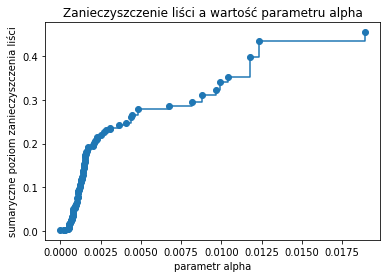

In [10]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("parametr alpha")
ax.set_ylabel("sumaryczne poziom zanieczyszczenia liści")
ax.set_title("Zanieczyszczenie liści a wartość parametru alpha")

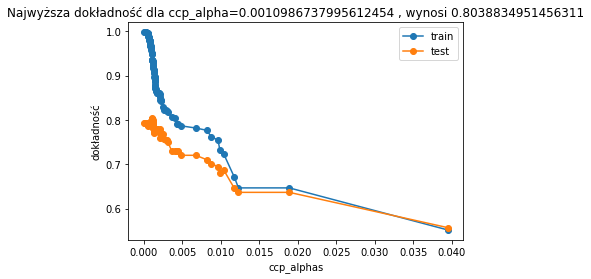

In [11]:
alfy = ccp_alphas

zb_trenujacy_wyniki = []
zb_testowy_wyniki = []

dokladnosc = []
tmp_cechy = cechy
for element in alfy:
    
    clf = DecisionTreeClassifier(ccp_alpha=element,random_state=0)
    clf.fit(X_train[tmp_cechy],y_train)
    yt_pred = clf.predict(X_train[tmp_cechy])
    y_pred = clf.predict(X_test[tmp_cechy])
    
        
    zb_trenujacy_wyniki.append(accuracy_score(y_train,yt_pred))
    zb_testowy_wyniki.append(accuracy_score(y_test,y_pred))
    dokladnosc.append(accuracy_score(y_test,y_pred))

max_el = max(dokladnosc)
indeks = dokladnosc.index(max_el)

tytul = 'Najwyższa dokładność dla ccp_alpha={} , wynosi {}'.format(alfy[indeks],max_el)
rysuj(alfy,zb_trenujacy_wyniki,zb_testowy_wyniki,'ccp_alphas',tytul)

# ważność cech, podgląd drzewka

In [12]:
model = DecisionTreeClassifier(max_depth=12,random_state=0)
model.fit(X_train[tmp_cechy],y_train)
yt_pred = model.predict(X_train[tmp_cechy])
y_pred = model.predict(X_test[tmp_cechy])

In [13]:
accuracy_score(y_test,y_pred)

0.8116504854368932

In [14]:
model.feature_importances_

array([0.04194648, 0.02059121, 0.02885333, 0.12001184, 0.20236115,
       0.34706099, 0.01645758, 0.0097452 , 0.04352409, 0.01760495,
       0.08875954, 0.06308364])

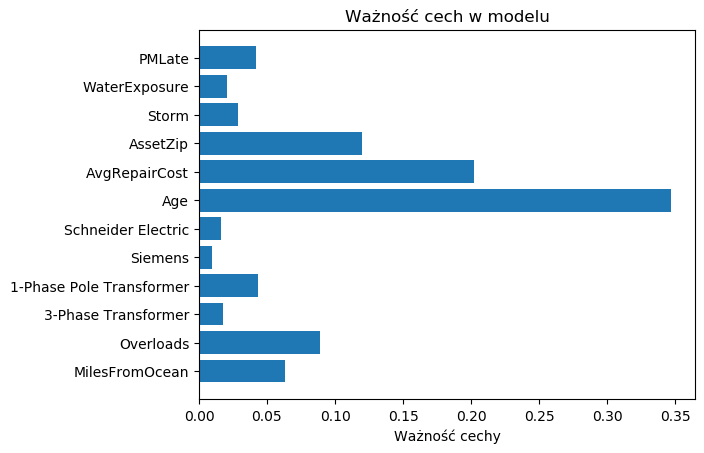

In [15]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data

y_pos = np.arange(len(tmp_cechy))
performance = model.feature_importances_


ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(cechy)
ax.invert_yaxis() 
ax.set_xlabel('Ważność cechy')
ax.set_title('Ważność cech w modelu')

plt.show()

In [16]:
from sklearn.tree import export_text
r = export_text(model, feature_names=cechy, max_depth=2)
print(r)

|--- Overloads <= 0.22
|   |--- PMLate <= 0.31
|   |   |--- Age <= -0.40
|   |   |   |--- truncated branch of depth 10
|   |   |--- Age >  -0.40
|   |   |   |--- truncated branch of depth 10
|   |--- PMLate >  0.31
|   |   |--- AvgRepairCost <= -2.76
|   |   |   |--- truncated branch of depth 3
|   |   |--- AvgRepairCost >  -2.76
|   |   |   |--- truncated branch of depth 10
|--- Overloads >  0.22
|   |--- Age <= 1.41
|   |   |--- 1-Phase Pole Transformer <= -0.20
|   |   |   |--- truncated branch of depth 10
|   |   |--- 1-Phase Pole Transformer >  -0.20
|   |   |   |--- truncated branch of depth 10
|   |--- Age >  1.41
|   |   |--- Age <= 3.80
|   |   |   |--- truncated branch of depth 2
|   |   |--- Age >  3.80
|   |   |   |--- truncated branch of depth 5

